<h1>Sustainable Energy Transitions</h1>
<div>A project by <a href="http://www.ssgouridis.org" target="_blank" >Sgouris Sgouridis</a> and <a href="http://www.csaladen.es" target="_blank" >Dénes Csala</a> at <a  href="http://www.masdar.ac.ae" target="_blank">Masdar Institute of Science and Technology</a></div>
<h2><br>Plotting notebook for social media images</h2>

This workbook will guide you through the mining, processing, formatting and saving the input data for the <a target="_blank" href="http://set.csaladen.es/set2.html">SET 2.0</a> model.

<p>This is document has been created using  <a target="_blank" href="http://ipython.org/">IPython Notebook</a> in the <a target="_blank" href="https://store.continuum.io/cshop/anaconda/">Anaconda</a> distribution and it can be edited and run in <i>active</i> mode by clicking download in top right corner of this page. The code is partitioned into sections, called <i>cells</i>. When you are using this workbook in <i>active</i> mode, double-click on a cell to edit it and then run using <code>Ctrl + Enter</code>. Hitting <code>Shift + Enter</code> runs the code and steps into the next cell, while <code>Alt + Enter</code> runs the code and adds a new, empty cell. If you are running this notebook on a presonal computer, you will need a machine with at least <i>1GB</i> of memory (<i>2GB</i> recommended) and a processor of <i>1GHz</i>.
<h2>Data</h2>
<p>The major data sources for this work are the <a href="http://set.csaladen.es/data/results/index.html" target="_blank">outputs</a> generated by the SET 2.0 model.
</p>
<h2>Processing</h2>
<p>The data processing has been done using the <a target="_blank" href="https://store.continuum.io/cshop/anaconda/">Anaconda</a> distribution of <a target="_blank" href="https://www.python.org/">Python 2.7</a> using the <i>IPython Notebook</i> editor. If you have not generated your own data, please download <a href="http://set.csaladen.es/data/results/index.html" target="_blank">all</a> results files, and run this <i>Iptyhon</i> notebook in the same folder. Then the data is loaded into a <a target="_blank" href="http://pandas.pydata.org/">pandas</a> dataframe, which represents the backbone of the data analysis. Numerical processing is done with <a target="_blank" href="http://www.numpy.org/">NumPy</a> and for plotting we use <a target="_blank" href="http://matplotlib.org/">matplotlib</a>. Please make sure you have all of these compoents set up in your <i>Python</i> installation. The workbook generates <i>.jpg</i> files to be inlcuded on the <a target="_blank" href="http://set.csaladen.es/">main</a> data presentation site.
</p>

<h1>Code</h1>

Import dependencies.

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
%matplotlib inline

In [2]:
mycolors=['#dd1c77','#df65b0','#980043']
abc='abcdefghijklmnopqrstuvwxyz' #for plot labeling

Set up save path on your local computer.

In [3]:
path="E:\Skydrive\GitHub\set"

#Cross-sections

In [4]:
#for plot styling - not necessary
plt.style.use('fivethirtyeight')
#plt.style.use('classic')

In [5]:
fpath = 'Comfortaa.ttf'
prop = font_manager.FontProperties(fname=fpath)

In [6]:
fuels=[u'hydro',u'nuclear',u'biofuels',u'other',u'biomass',u'coal',u'oil',u'gas',u'geoth.',u'wind',u'PV',u'CSP']
#fuelcolors=['#5e4fa2','#3288bd','#66c2a5','#abdda4','#9e0142','#d53e4f','#f46d43','#78c679','#e6f598','#fee08b','#fdae61']
#fuelcolors=['#41b6c4','#1d91c0','#225ea8','#253494','#5e4fa2','#7a0177','#ae017e','#dd3497','#a6d96a','#d9ef8b','#fee08b','#fdae61']
fuelcolors=[np.array([40,40,80])/256.0,
            np.array([85,20,52])/256.0,
            np.array([131,13,98])/256.0,
            np.array([213,9,98])/256.0,
            np.array([0,64,16])/256.0,
            np.array([112,133,16])/256.0,
            np.array([251,212,31])/256.0,
            np.array([254,159,28])/256.0]

In [10]:
#invert colors
fuelcolors=[1-i for i in fuelcolors]

In [11]:
#redefine smooth window
moving_window=9
ee=[0,20,20,20,20,20,14,10,7]
dd=[0,1000,1500,2000,2500,3000,3000,3000,3000]
for year in {1,2,3,4,5,6,7,8}:
    df=pd.read_excel('twitter/x'+str(year)+'.xlsx',sheetname='net')
    df=pd.rolling_mean(df,moving_window)
    sets={}
    for n in df.columns:
        sets[n]=[[],[]]
        x=df[n].index
        m=df[n].as_matrix()
        for i in range(len(x)):
            sets[n][0].append(x[i])
            sets[n][1].append(m[i])

    df=pd.read_excel('twitter/x'+str(year)+'.xlsx',sheetname='gross')
    df=pd.rolling_mean(df,moving_window)
    sets2={}
    for n in df.columns:
        sets2[n]=[[],[]]
        x=df[n].index
        m=df[n].as_matrix()
        for i in range(len(x)):
            sets2[n][0].append(x[i])
            sets2[n][1].append(m[i])
    sets2.pop('net');

    x=sets[u'CSP'][0]
    y=[0 for i in range(len(x))]
    net=pd.DataFrame([0 for i in range(len(x))])
    gross=pd.DataFrame([0 for i in range(len(x))])
    labels=[]

    fig = plt.figure(figsize=(8,5))                                                               
    ax=[]
    ax.append(plt.subplot2grid((2,2), (0,0), rowspan=2, colspan=2, axisbg=None, axisbelow=True))
    fig.tight_layout()  
    fig.subplots_adjust(wspace=0.35)

    for i in range(len(fuels[5:])):
        fuel=fuels[::-1][i]
        if fuel==u'geoth.':fuel='geo'
        gross+=pd.DataFrame(sets2[fuel][1])
        y=np.vstack((sets2[fuel][1],y)) 

    g=pd.DataFrame(range(151))
    g[0]=0
    for i in range(len(fuels)):
        fuel=fuels[::-1][i]
        gross+=pd.DataFrame(sets[fuel][1])
        net+=pd.DataFrame(sets[fuel][1])
        if fuel not in {u'hydro',u'nuclear',u'biofuels',u'other',u'biomass'}:
            y=np.vstack((sets[fuel][1],y)) 
        else:
            g+=pd.DataFrame(sets[fuel][1])
    y=np.vstack((g[0],y))

    sp=ax[0].stackplot(x,y,alpha=0.9,colors=fuelcolors+fuelcolors[1:])
    proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors+fuelcolors[1:])[j-1]) for j,pol in enumerate(sp)][::-1]
    #ax[0].legend(proxy[7:], (labels[7:]),loc=2,framealpha=0,fontsize=11) 

    ax2=ax[0].twinx()
    ax3=ax[0].twinx()
    ax2.plot([0],[0],linewidth=2,linestyle='-',color='k',label='Net')
    ax3.plot([0],[0],linewidth=2,linestyle='--',color='w',label='    ')
    ax2.plot(x,net,linewidth=2,linestyle='--',color='w')
    ax2.plot([1958,2100],[2000,2001],lw=0.5,color="grey")

    yl=350000
    ax[0].set_ylim(0,yl)
    ax2.set_ylim(0,yl)
    ax[0].set_xlim(1950,2100)
    ax[0].set_yticklabels([0,50,100,150,200,250,300],fontproperties=prop,size=12)
    ax[0].set_xticklabels([1940,1960,1980,2000,2020,2040,2060,2080,2100],fontproperties=prop,size=12)
    #ax[0].set_xlabel('Year',size=12)
    ax[0].set_ylabel('Primary Energy Demand [1000 TWh / year]',fontproperties=prop,size=14,labelpad=10)
    ax2.set_yticklabels([])
    ax3.set_yticklabels([])
    ax3.set_yticks([])
    #ax2.legend(ncol=2,loc=2,framealpha=0,fontsize=12)
    #ax3.legend(ncol=2,loc=2,framealpha=0,fontsize=12)
    ax2.text(1.045, 0.5, str(dd[year])+' W / person',
        horizontalalignment='right',fontproperties=prop,
        verticalalignment='center',rotation=90,
        transform=ax2.transAxes,size=14,color='k')

    ax[0].text(0.5, 1.02, r"Fossil phase-out: 2020-2075   |   Emissions cap: 990 GtCO$_2$",
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')
    ax[0].text(0.5, 1.11, r"EROEI = "+str(ee[year])+" in year 2014   |   Demand = "+str(dd[year])+" W / person in year 2100",
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')

    ax[0].plot([2014,2014.001],[160000,300000],color='grey',ls='--',lw=1)
    ax[0].text(0.43, 0.96, r"historical     projection",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[0].transAxes,size=10,color='grey')

    ax[0].grid('off')
    ax2.grid('off')
    ax3.grid('off')
    #ax[0].set_axis_bgcolor('w')
    #ax2.set_axis_bgcolor('w')
    #ax3.set_axis_bgcolor('w')
    
    plt.suptitle('Detailed Sustainable Energy Transition Path',fontproperties=prop,size=17,y=1.15)
    #plt.savefig(path+'/twitter/cut'+str(year)+'.png',bbox_inches = 'tight', facecolor="w", pad_inches = 0.1, dpi=150)
    plt.savefig(path+'/twitter/xinv'+str(year)+'.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
    plt.close()

C:\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=9,center=False).mean()
C:\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=9,center=False).mean()


C:\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=9,center=False).mean()
C:\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=9,center=False).mean()


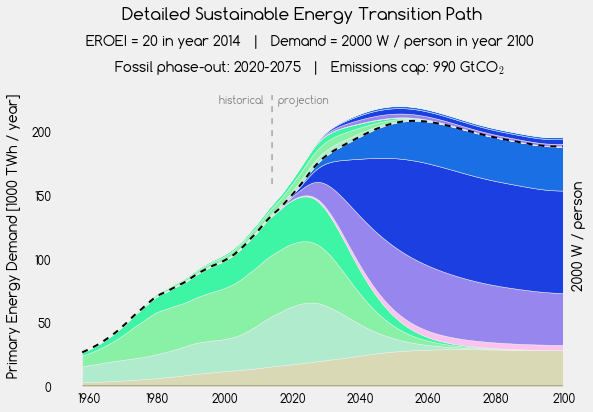

In [14]:
#redefine smooth window
moving_window=9
ee=[0,20,20,20,20,20,14,10,7]
dd=[0,1000,1500,2000,2500,3000,3000,3000,3000]
for year in {3}:
    df=pd.read_excel('twitter/x'+str(year)+'.xlsx',sheetname='net')
    df=pd.rolling_mean(df,moving_window)
    sets={}
    for n in df.columns:
        sets[n]=[[],[]]
        x=df[n].index
        m=df[n].as_matrix()
        for i in range(len(x)):
            sets[n][0].append(x[i])
            sets[n][1].append(m[i])

    df=pd.read_excel('twitter/x'+str(year)+'.xlsx',sheetname='gross')
    df=pd.rolling_mean(df,moving_window)
    sets2={}
    for n in df.columns:
        sets2[n]=[[],[]]
        x=df[n].index
        m=df[n].as_matrix()
        for i in range(len(x)):
            sets2[n][0].append(x[i])
            sets2[n][1].append(m[i])
    sets2.pop('net');

    x=sets[u'CSP'][0]
    y=[0 for i in range(len(x))]
    net=pd.DataFrame([0 for i in range(len(x))])
    gross=pd.DataFrame([0 for i in range(len(x))])
    labels=[]

    fig = plt.figure(figsize=(8,5))                                                               
    ax=[]
    ax.append(plt.subplot2grid((2,2), (0,0), rowspan=2, colspan=2, axisbg=None, axisbelow=True))
    fig.tight_layout()  
    fig.subplots_adjust(wspace=0.35)

    for i in range(len(fuels[5:])):
        fuel=fuels[::-1][i]
        if fuel==u'geoth.':fuel='geo'
        gross+=pd.DataFrame(sets2[fuel][1])
        y=np.vstack((sets2[fuel][1],y)) 

    g=pd.DataFrame(range(151))
    g[0]=0
    for i in range(len(fuels)):
        fuel=fuels[::-1][i]
        gross+=pd.DataFrame(sets[fuel][1])
        net+=pd.DataFrame(sets[fuel][1])
        if fuel not in {u'hydro',u'nuclear',u'biofuels',u'other',u'biomass'}:
            y=np.vstack((sets[fuel][1],y)) 
        else:
            g+=pd.DataFrame(sets[fuel][1])
    y=np.vstack((g[0],y))

    sp=ax[0].stackplot(x,y,alpha=0.9,colors=fuelcolors+fuelcolors[1:])
    proxy = [mpl.patches.Rectangle((0,0), 0,0, facecolor=(fuelcolors+fuelcolors[1:])[j-1]) for j,pol in enumerate(sp)][::-1]
    #ax[0].legend(proxy[7:], (labels[7:]),loc=2,framealpha=0,fontsize=11) 

    ax2=ax[0].twinx()
    ax3=ax[0].twinx()
    ax2.plot([0],[0],linewidth=2,linestyle='-',color='w',label='Net')
    ax3.plot([0],[0],linewidth=2,linestyle='--',color='k',label='    ')
    ax2.plot(x,net,linewidth=2,linestyle='--',color='k')
    ax2.plot([1958,2100],[2000,2001],lw=0.5,color="grey")

    yl=240000
    ax[0].set_ylim(0,yl)
    ax2.set_ylim(0,yl)
    ax[0].set_xlim(1950,2100)
    ax[0].set_yticklabels([0,50,100,150,200,250],fontproperties=prop,size=12)
    ax[0].set_xticklabels([1940,1960,1980,2000,2020,2040,2060,2080,2100],fontproperties=prop,size=12)
    #ax[0].set_xlabel('Year',size=12)
    ax[0].set_ylabel('Primary Energy Demand [1000 TWh / year]',fontproperties=prop,size=14,labelpad=10)
    ax2.set_yticklabels([])
    ax3.set_yticklabels([])
    ax3.set_yticks([])
    #ax2.legend(ncol=2,loc=2,framealpha=0,fontsize=12)
    #ax3.legend(ncol=2,loc=2,framealpha=0,fontsize=12)
    ax2.text(1.045, 0.5, str(dd[year])+' W / person',
        horizontalalignment='right',fontproperties=prop,
        verticalalignment='center',rotation=90,
        transform=ax2.transAxes,size=14,color='k')

    ax[0].text(0.5, 1.02, r"Fossil phase-out: 2020-2075   |   Emissions cap: 990 GtCO$_2$",
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')
    ax[0].text(0.5, 1.11, r"EROEI = "+str(ee[year])+" in year 2014   |   Demand = "+str(dd[year])+" W / person in year 2100",
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')

    ax[0].plot([2014,2014.001],[160000,230000],color='grey',ls='--',lw=1)
    ax[0].text(0.43, 0.96, r"historical     projection",
        horizontalalignment='center',
        verticalalignment='top',fontproperties=prop,
        transform=ax[0].transAxes,size=10,color='grey')

    ax[0].grid('off')
    ax2.grid('off')
    ax3.grid('off')
    #ax[0].set_axis_bgcolor('w')
    #ax2.set_axis_bgcolor('w')
    #ax3.set_axis_bgcolor('w')
    
    plt.suptitle('Detailed Sustainable Energy Transition Path',fontproperties=prop,size=17,y=1.15)
    #plt.savefig(path+'/twitter/cut'+str(year)+'.png',bbox_inches = 'tight', facecolor="w", pad_inches = 0.1, dpi=150)
    plt.savefig(path+'/twitter/xinv.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
    #plt.close()

<p><br><p>We would like to express our gratitude to all of the developers of the libraries used and especially to the affiliates of <i>EIA, BP and World Bank</i> for their great database and openly accesible data. The data manipulation algorithms are open sourced and freely reproducible under an <a href="http://opensource.org/licenses/MIT" target="_blank">MIT license</a>.</p>
<br>
<p><a href="http://www.csaladen.es" target="_blank">Dénes Csala</a>&nbsp;&nbsp;|&nbsp;&nbsp;2016</p>